In [8]:
#install.packages('AmesHousing')
#install.packages('ggpubr')



In [9]:
#install.packages('IRkernel')
#IRkernel::installspec()  # to register the kernel in the current R installation


In [40]:
options(repr.plot.width  = 15,
        repr.plot.height = 10)

# Import libraries

In [11]:
library(AmesHousing)

# Helper packages
library(dplyr)     # for data manipulation
library(ggplot2)   # for awesome graphics
library(ggpubr)

# Modeling process packages
library(rsample)   # for resampling procedures
library(caret)     # for resampling and model training
library(h2o)       # for resampling and model training
library(recipes)  # for feature engineering tasks


# h2o set-up 
h2o.no_progress()  # turn off h2o progress bars
h2o.init()         # launch h2o

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 minutes 36 seconds 
    H2O cluster timezone:       America/Montevideo 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.1.3 
    H2O cluster version age:    6 days  
    H2O cluster name:           H2O_started_from_R_creyesp_wwr066 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   2.56 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.3 (2020-02-29) 



# Load Dataset

In [17]:
# Ames housing data
ames <- AmesHousing::make_ames()
ames.h2o <- as.h2o(ames)
head(ames)

Warning message in use.package("data.table"):
“data.table cannot be used without R package bit64 version 0.9.7 or higher.  Please upgrade to take advangage of data.table speedups.”


MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


# Data Splitting

In [25]:
?createDataPartition

In [53]:
# Using base R
set.seed(123)  # for reproducibility
index_1 <- sample(1:nrow(ames), round(nrow(ames) * 0.7))
train_base <- ames[index_1, ]
test_base  <- ames[-index_1, ]

# Using caret package
index_2 <- createDataPartition(ames$Sale_Price, p = 0.7, 
                               list = FALSE, )
train_caret <- ames[index_2, ]
test_caret  <- ames[-index_2, ]

# Using rsample package
split_1  <- initial_split(ames, prop = 0.7, strata = Sale_Price)
train_rsample  <- training(split_1)
test_rsample   <- testing(split_1)

# Using h2o package
split_2 <- h2o.splitFrame(ames.h2o, ratios = 0.7, 
                          seed = 123)
train_h2o <- split_2[[1]]
test_h2o  <- split_2[[2]]

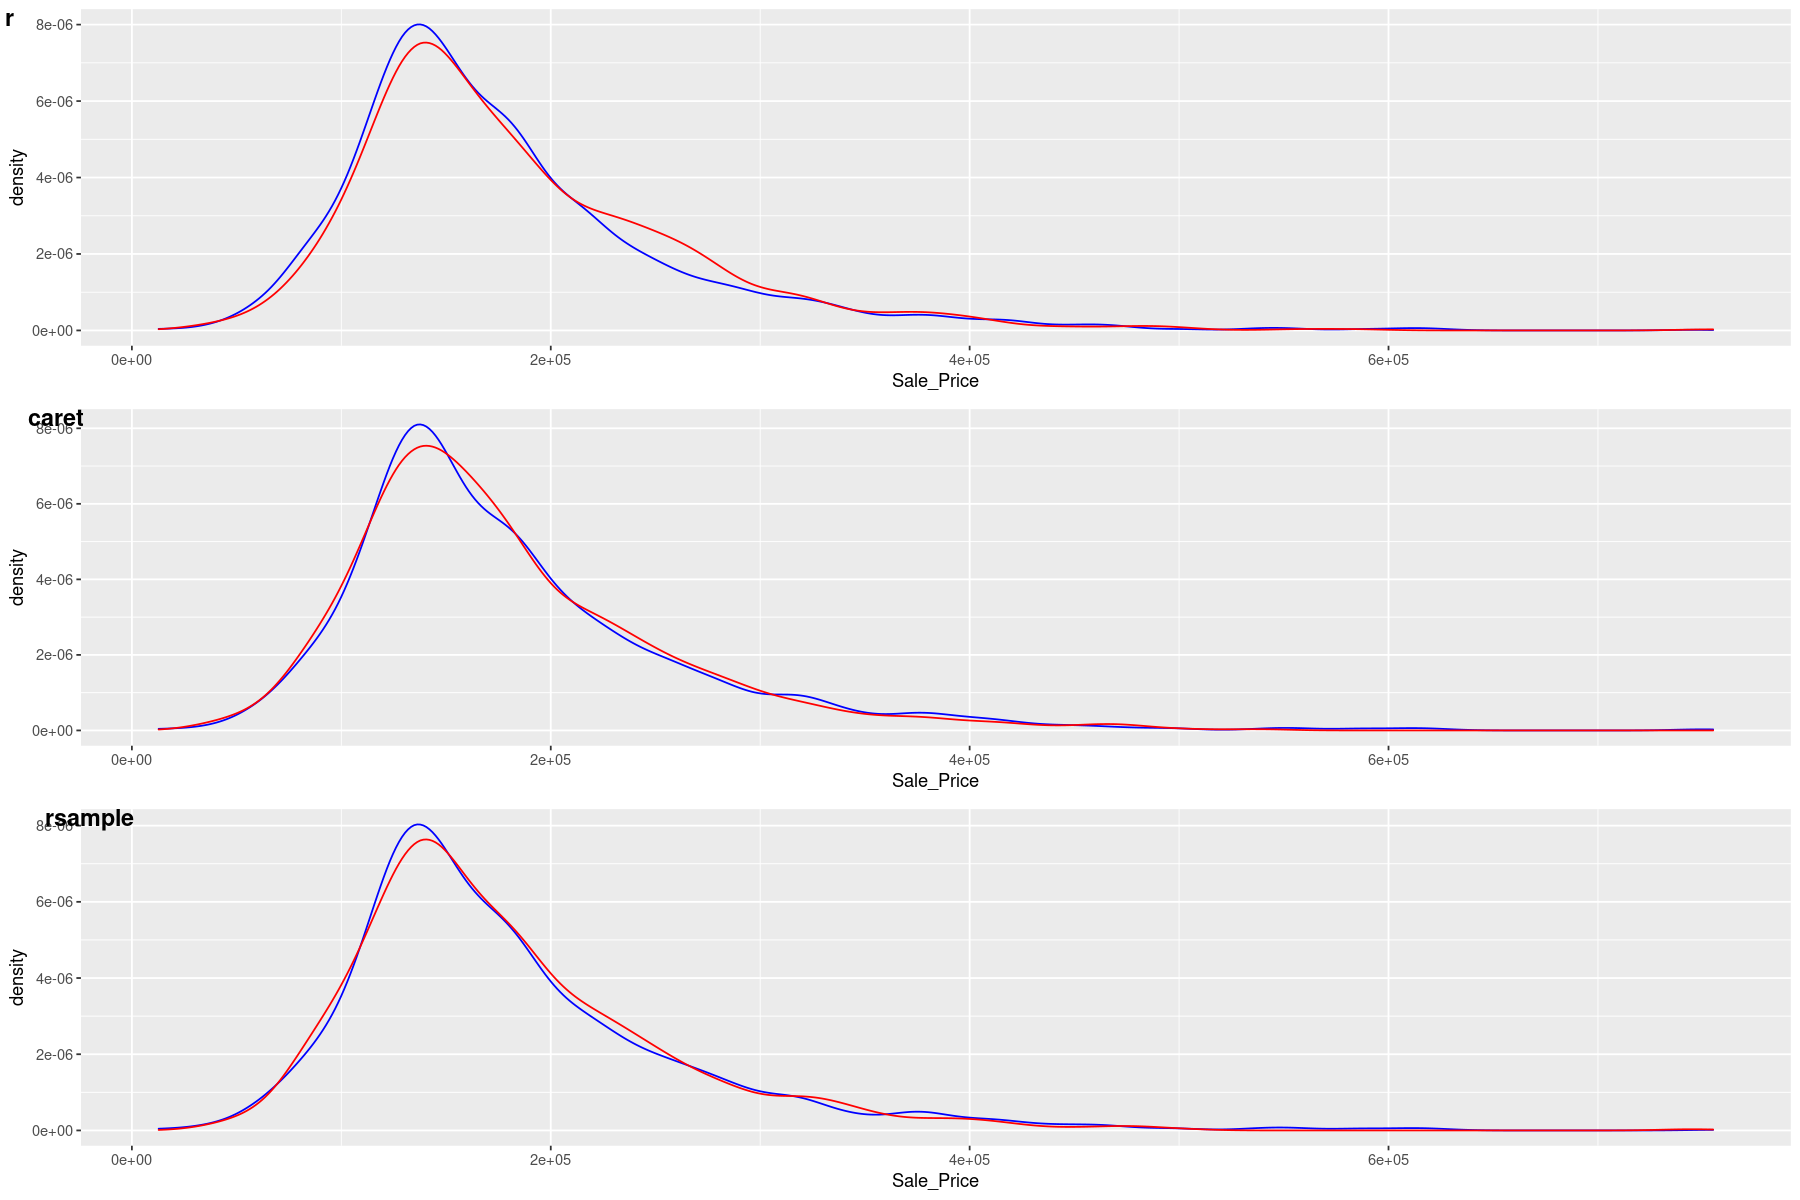

In [58]:
fig1 <- ggplot() + 
    geom_density(data=train_base, aes(Sale_Price), color='blue') + 
    geom_density(data=test_base, aes(Sale_Price), color='red')

fig2 <- ggplot() + 
    geom_density(data=train_caret, aes(Sale_Price), color='blue') + 
    geom_density(data=test_caret, aes(Sale_Price), color='red')

fig3 <- ggplot() + 
    geom_density(data=train_rsample, aes(Sale_Price), color='blue') + 
    geom_density(data=test_rsample, aes(Sale_Price), color='red')

ggarrange(fig1, fig2, fig3, labels = c("r", "caret", "rsample"), ncol = 1, nrow = 3)

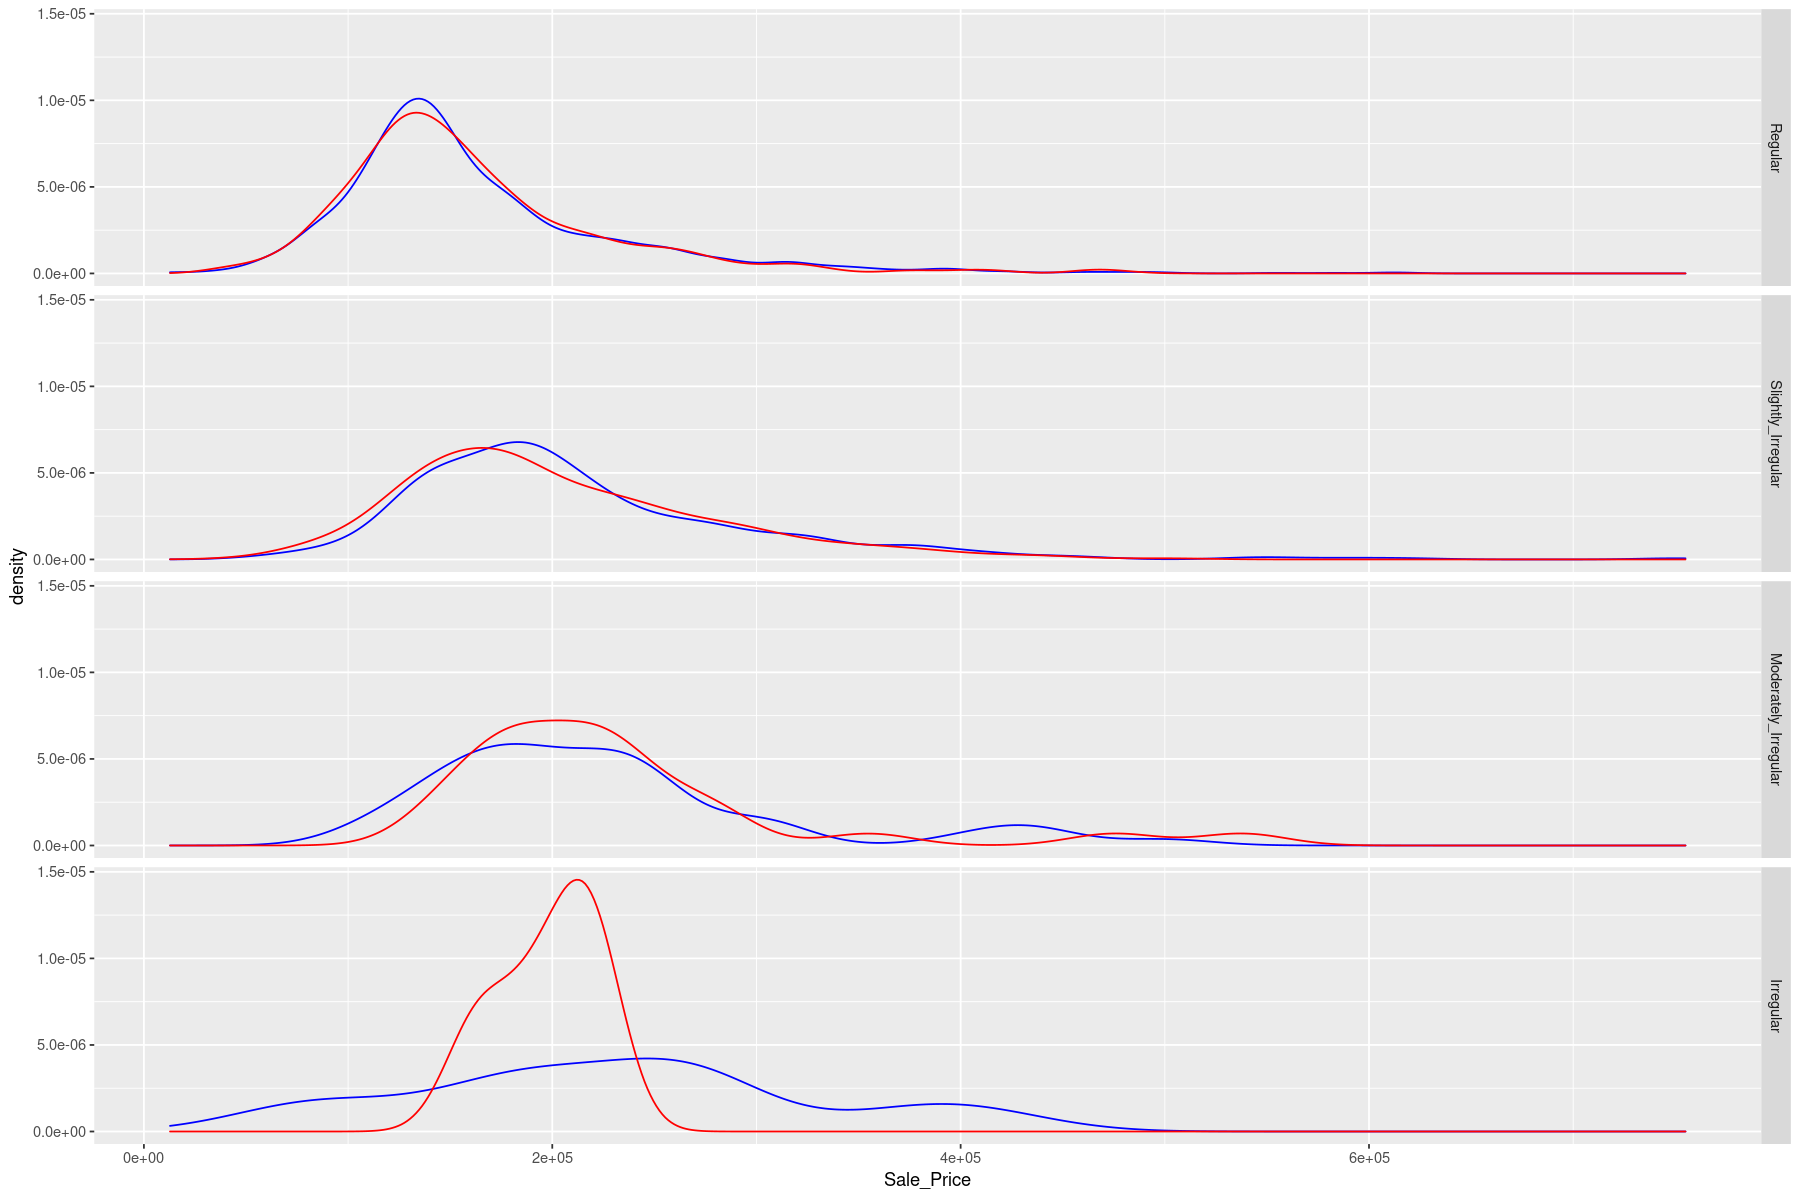

In [62]:
ggplot() + 
    geom_density(data=train_caret, aes(Sale_Price), color='blue') + 
    geom_density(data=test_caret, aes(Sale_Price), color='red') + 
    facet_grid(rows = vars(Lot_Shape))

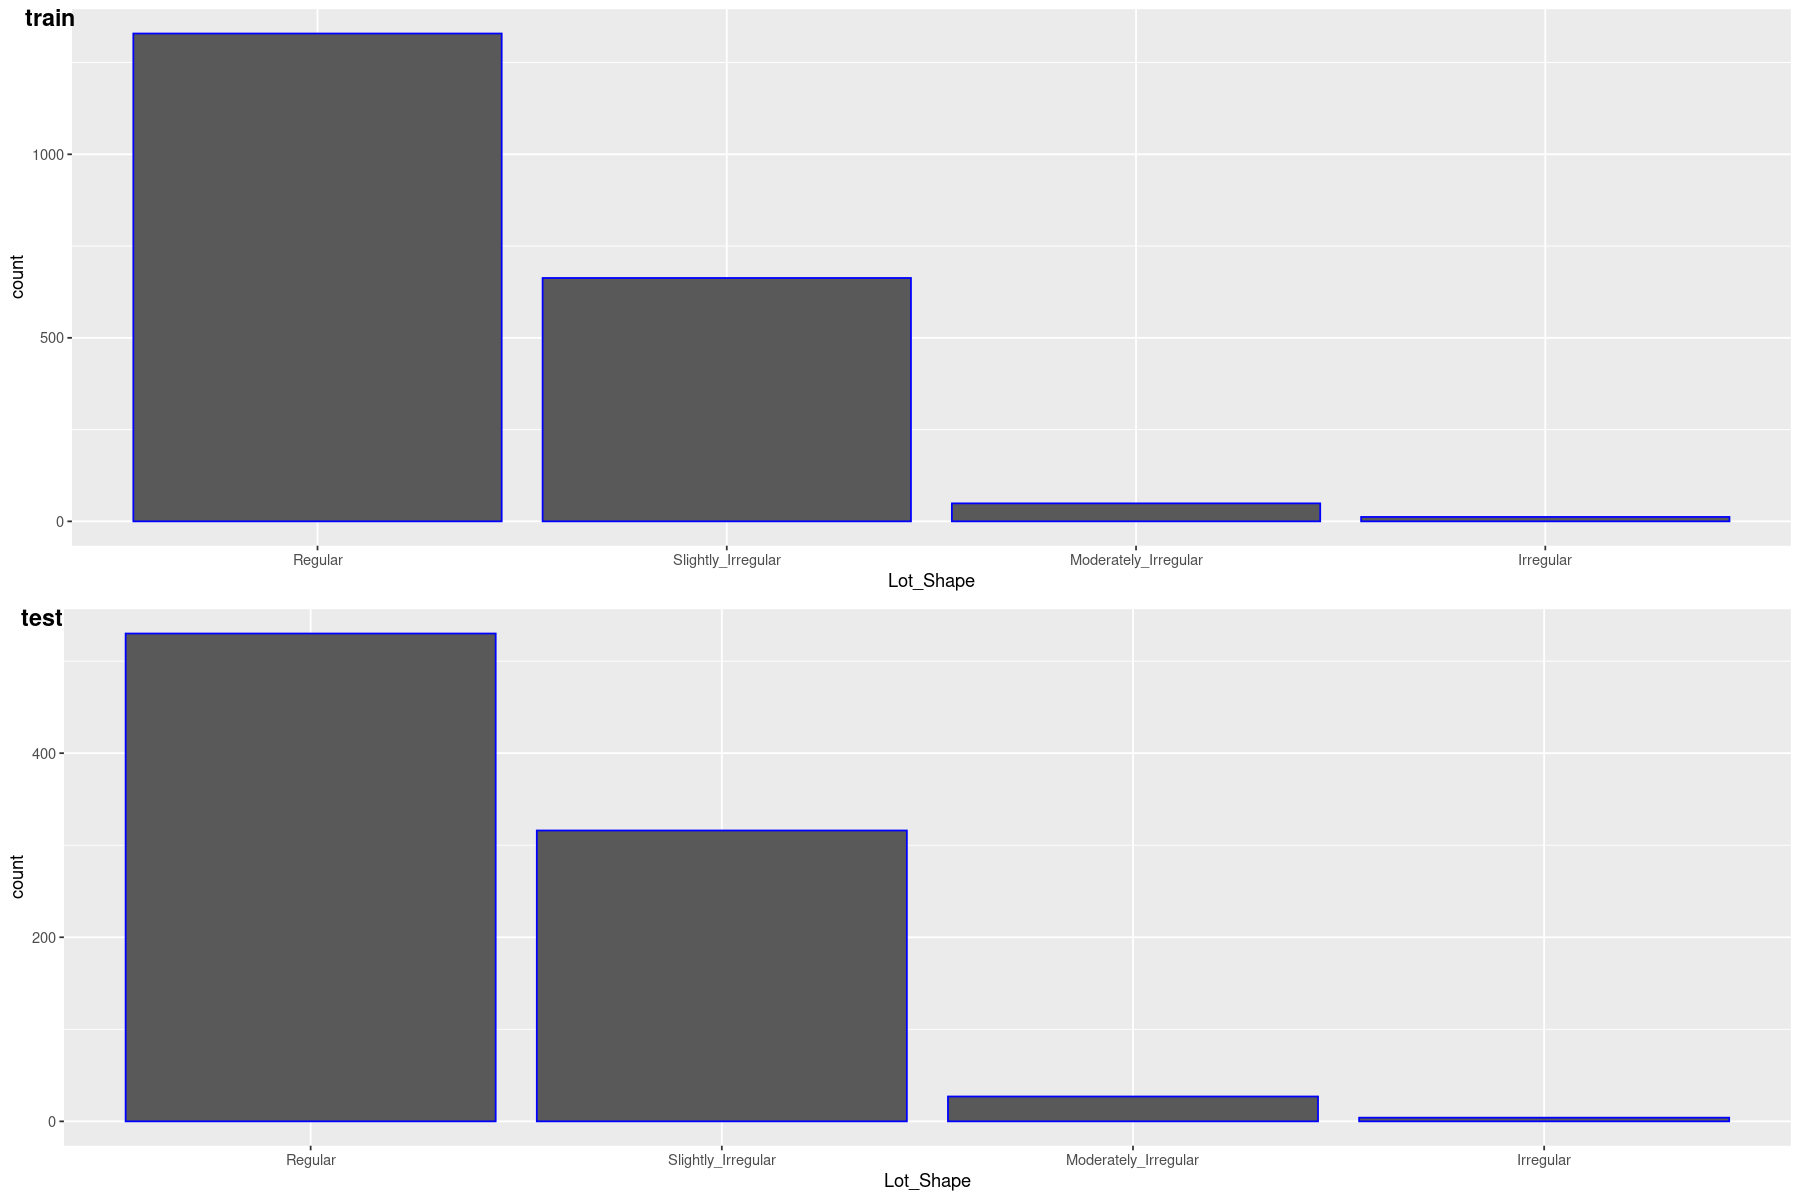

In [49]:
fig1 = ggplot() + 
    geom_bar(data=train_2, aes(x=Lot_Shape), color='blue')
fig2 = ggplot() + 
    geom_bar(data=test_2, aes(x=Lot_Shape), color='blue')
ggarrange(fig1, fig2, labels = c("train", "test"), ncol = 1, nrow = 2)

# Exploratory Data Analysis

In [50]:
# initial dimension
dim(ames)

[1] 2930   81

In [51]:
# response variable
head(ames$Sale_Price)

[1] 215000 105000 172000 244000 189900 195500

In [52]:
colnames(ames) 

[1] "MS_SubClass"        "MS_Zoning"          "Lot_Frontage"      
 [4] "Lot_Area"           "Street"             "Alley"             
 [7] "Lot_Shape"          "Land_Contour"       "Utilities"         
[10] "Lot_Config"         "Land_Slope"         "Neighborhood"      
[13] "Condition_1"        "Condition_2"        "Bldg_Type"         
[16] "House_Style"        "Overall_Qual"       "Overall_Cond"      
[19] "Year_Built"         "Year_Remod_Add"     "Roof_Style"        
[22] "Roof_Matl"          "Exterior_1st"       "Exterior_2nd"      
[25] "Mas_Vnr_Type"       "Mas_Vnr_Area"       "Exter_Qual"        
[28] "Exter_Cond"         "Foundation"         "Bsmt_Qual"         
[31] "Bsmt_Cond"          "Bsmt_Exposure"      "BsmtFin_Type_1"    
[34] "BsmtFin_SF_1"       "BsmtFin_Type_2"     "BsmtFin_SF_2"      
[37] "Bsmt_Unf_SF"        "Total_Bsmt_SF"      "Heating"           
[40] "Heating_QC"         "Central_Air"        "Electrical"        
[43] "First_Flr_SF"       "Second_Flr_SF"      "Low_Qual_Fin_SF"   
[46] "Gr_Liv_Area"        "Bsmt_Full_Bath"     "Bsmt_Half_Bath"    
[49] "Full_Bath"          "Half_Bath"          "Bedroom_AbvGr"     
[52] "Kitchen_AbvGr"      "Kitchen_Qual"       "TotRms_AbvGrd"     
[55] "Functional"         "Fireplaces"         "Fireplace_Qu"      
[58] "Garage_Type"        "Garage_Finish"      "Garage_Cars"       
[61] "Garage_Area"        "Garage_Qual"        "Garage_Cond"       
[64] "Paved_Drive"        "Wood_Deck_SF"       "Open_Porch_SF"     
[67] "Enclosed_Porch"     "Three_season_porch" "Screen_Porch"      
[70] "Pool_Area"          "Pool_QC"            "Fence"             
[73] "Misc_Feature"       "Misc_Val"           "Mo_Sold"           
[76] "Year_Sold"          "Sale_Type"          "Sale_Condition"    
[79] "Sale_Price"         "Longitude"          "Latitude"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



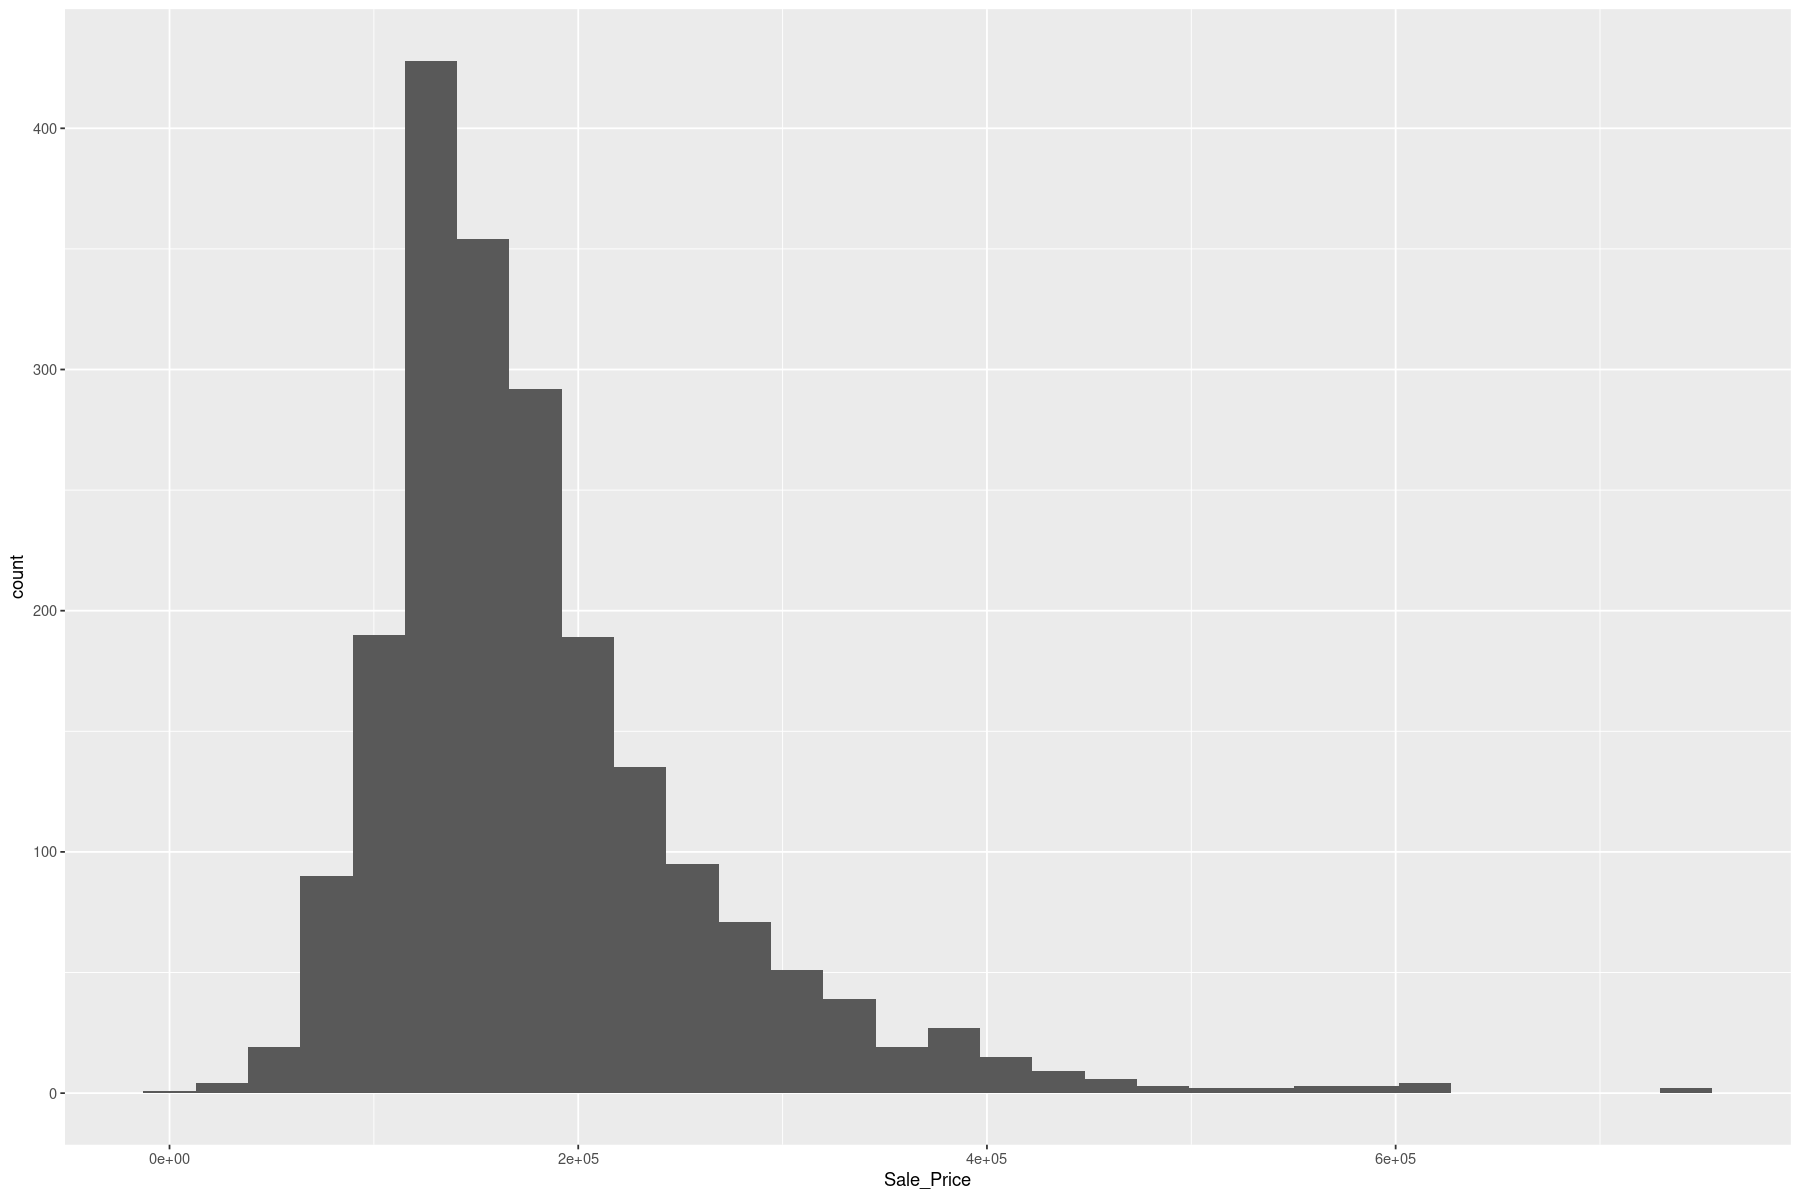

In [66]:
ggplot(data=train_caret, aes(x=Sale_Price), color='blue') + 
    geom_histogram()

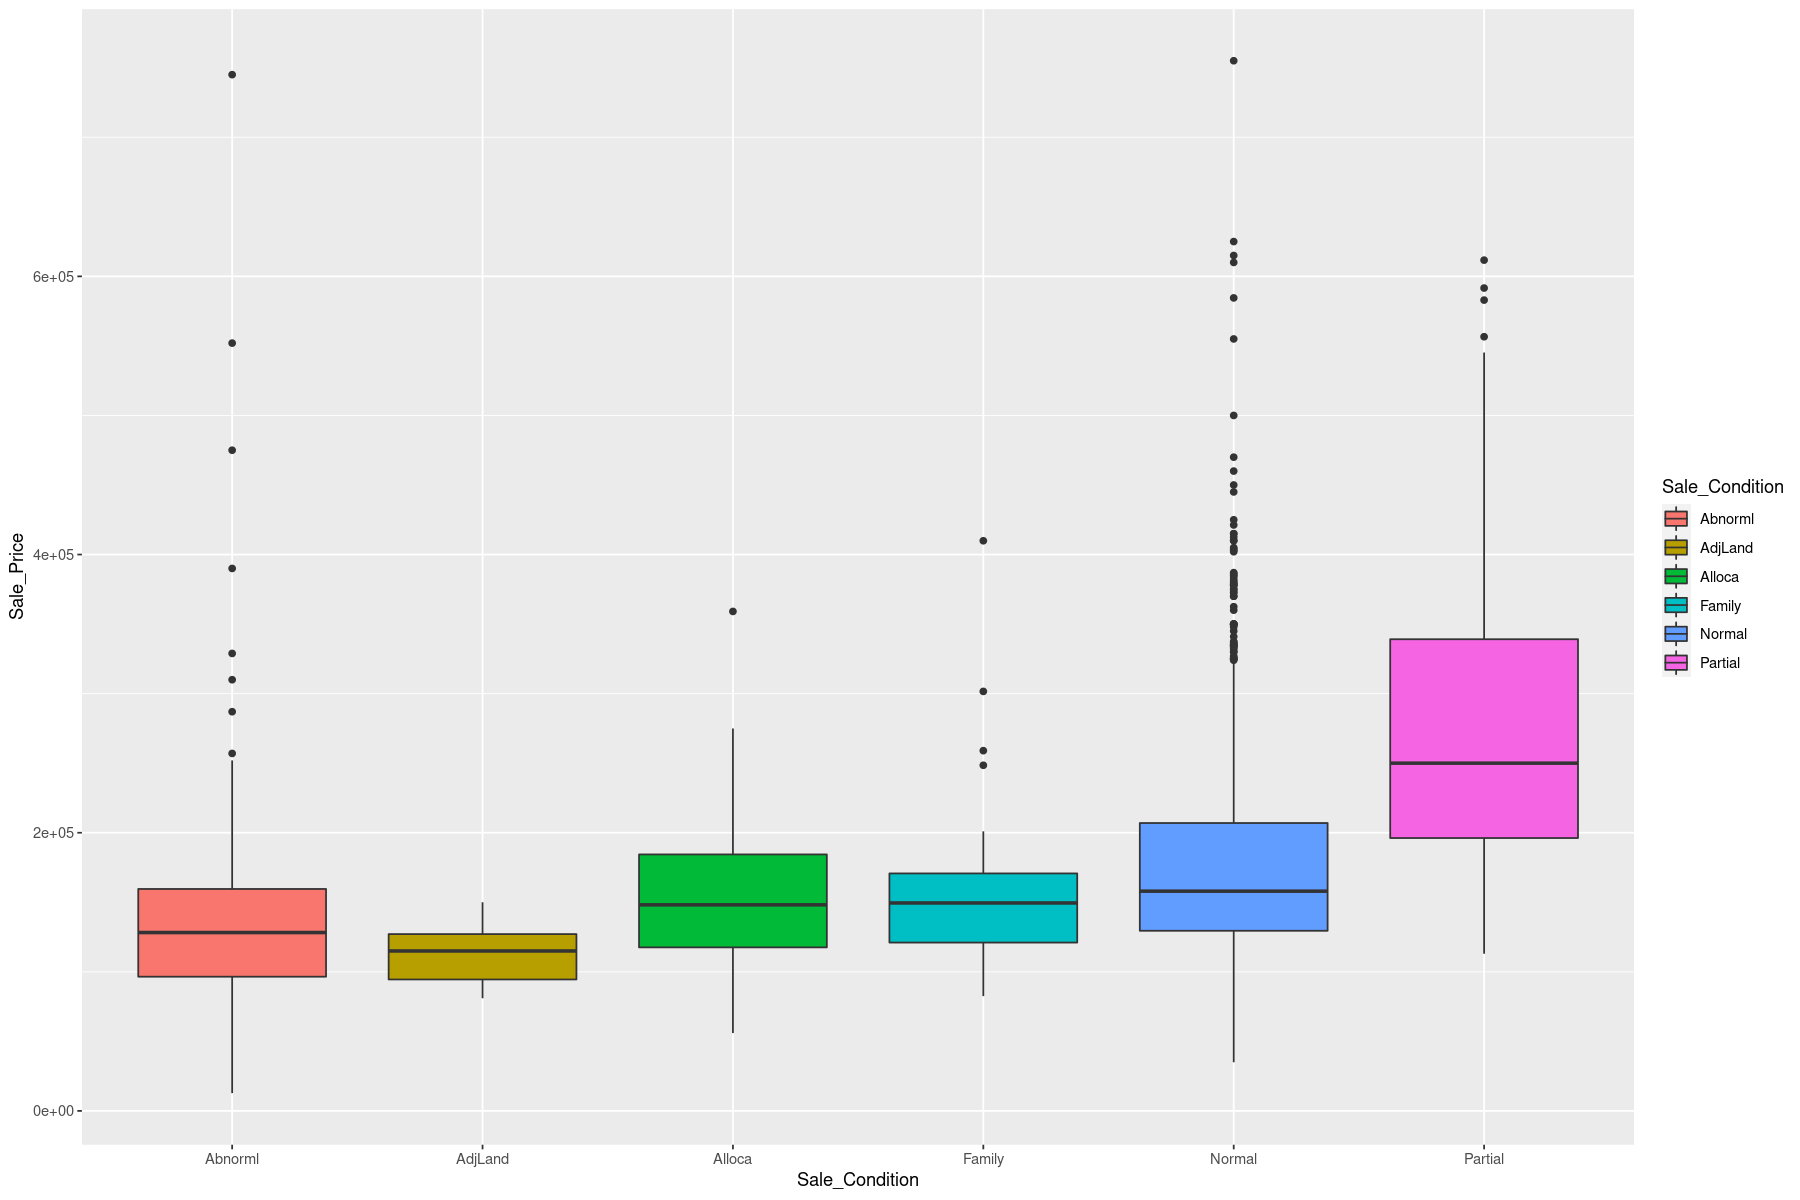

In [84]:
ggplot(data=train_caret, aes(x=Sale_Condition, y=Sale_Price, fill=Sale_Condition)) + 
    geom_boxplot()

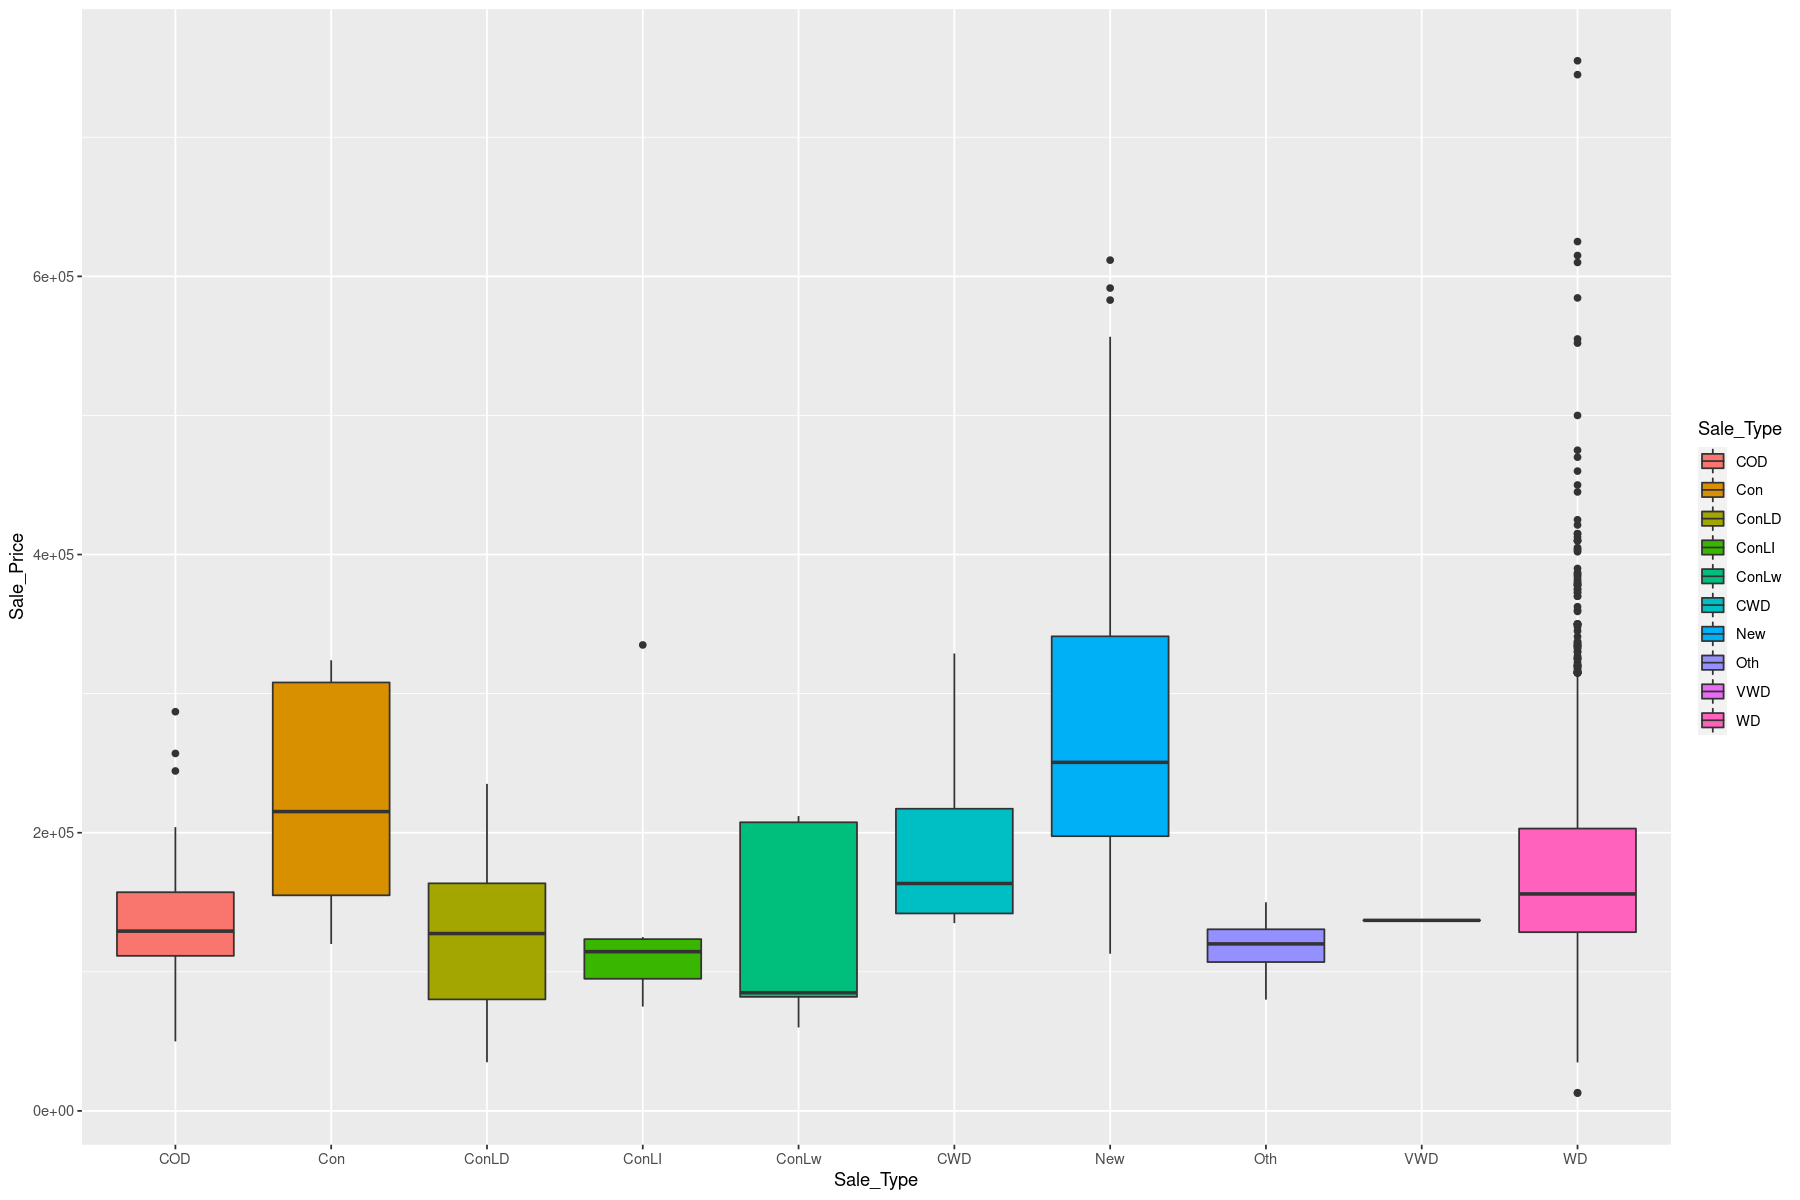

In [85]:
ggplot(data=train_caret, aes(x=Sale_Type, y=Sale_Price, fill=Sale_Type)) + 
    geom_boxplot()

Warning message:
“Removed 9 rows containing missing values (geom_point).”


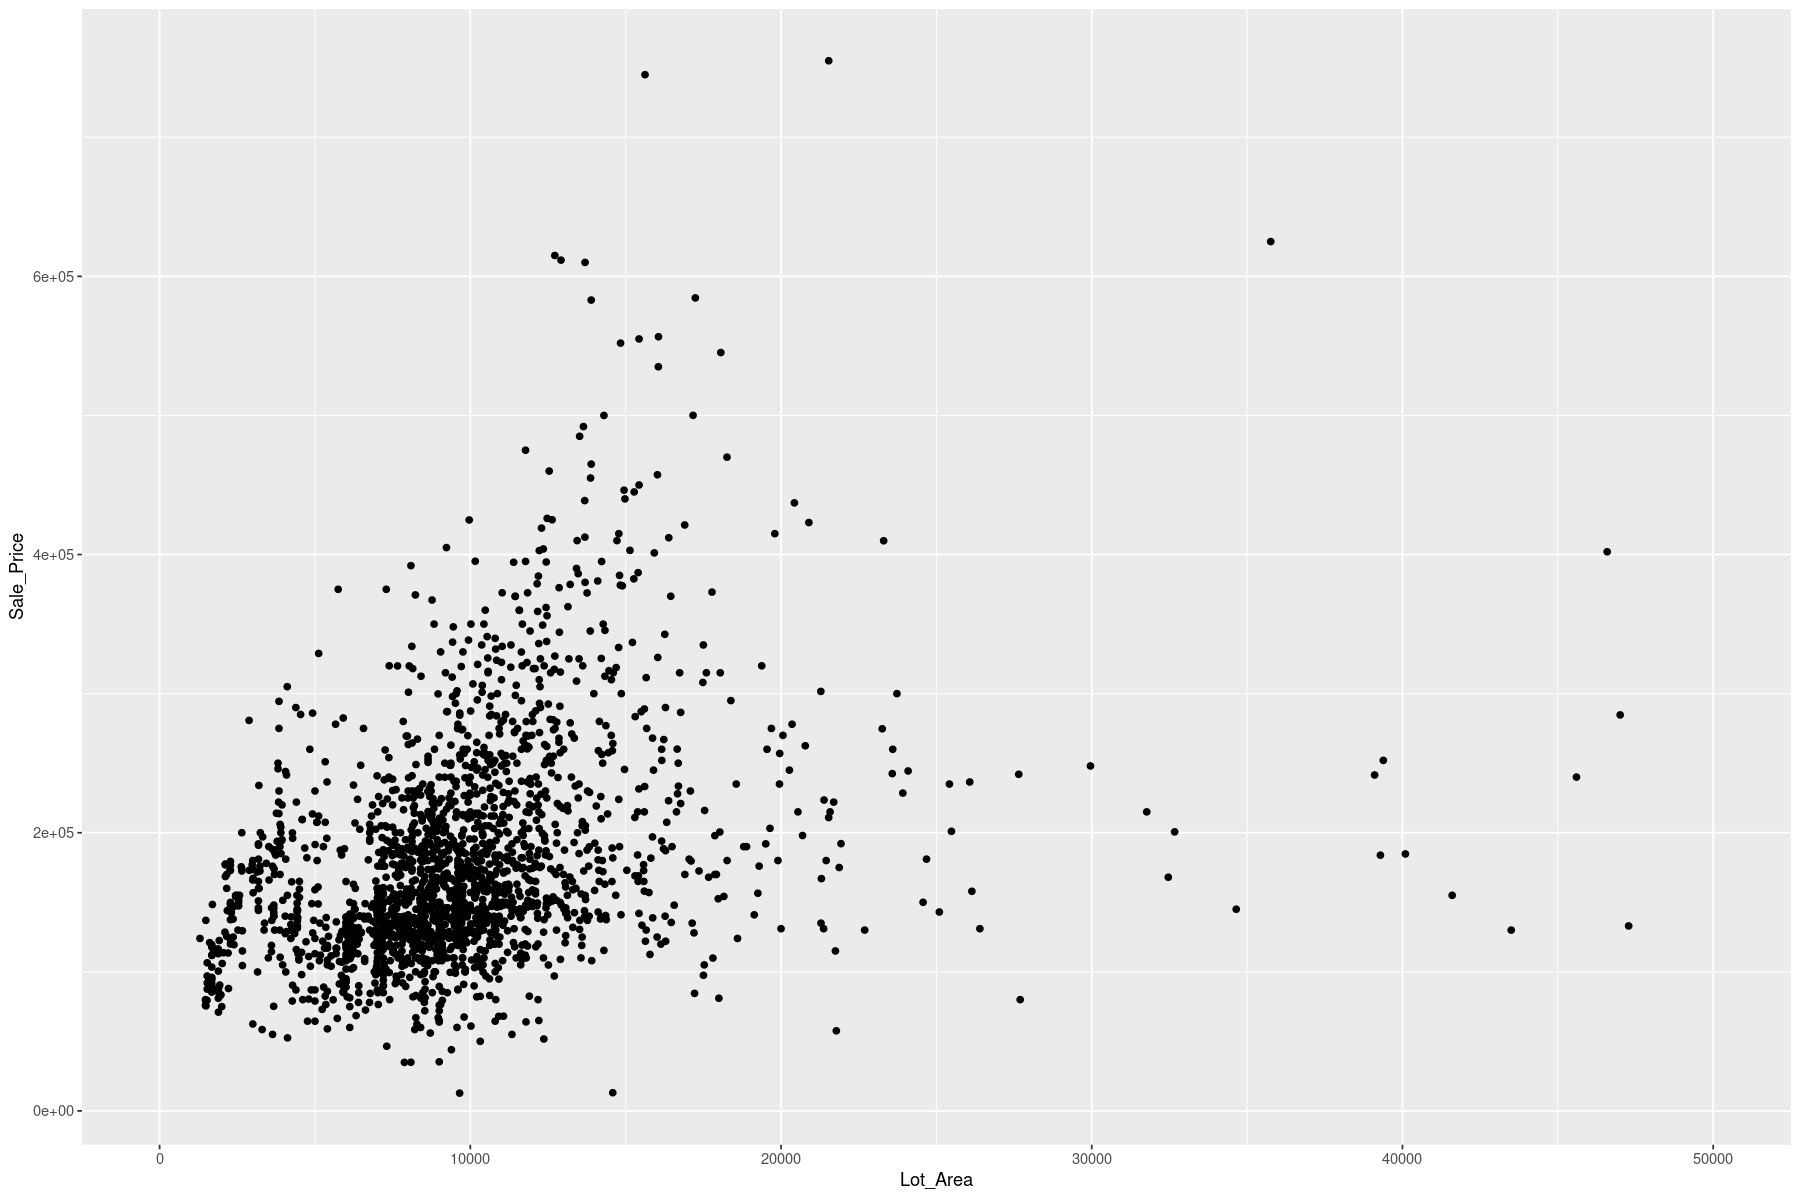

In [91]:
ggplot(data=train_caret, aes(x=Lot_Area, y=Sale_Price)) + 
    geom_point() + 
    xlim(0, 5e4)

# Modeling
R tiene un amplio abanico de librerías que implementan diferentes tipos de modelos e incluso varias implementaciones del mismo modelo pero con diferentes enfoques. Además de estos hay librerías que unifican estas para agilizar el proceso de modelo y estandarizar los procesos.

Hay diferentes formas de cómo se deben pasar la data para entrenar un modelo:
* Clásica de R usando una formula como una expresión simbólica de la relación de dependencia
    * `fn(Y ~ X)`
* usando separadamente $Y$, $X$ como argumentos independientes
    * `fn(x = ames[, features], y = ames$Sale_Price)`
* usando separadamente $Y$, $X$ pero pasando solo el nombre de las variables de un dataframe
    * `fn(x = c("Year_Sold", "Longitude", "Latitude"), y = "Sale_Price", data = ames.h2o)`



## Engines
Como se mencion anteriormente hay varias librerías que implementan por ejemplo el mismo modelo pero con diferente sabores, estos son conocidos como "engines"


### Lineal models

[Classic linear models](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)

In [69]:
lm_lm <- lm(Sale_Price ~ ., data = train_caret)
summary(lm_lm)


Call:
lm(formula = Sale_Price ~ ., data = train_caret)

Residuals:
    Min      1Q  Median      3Q     Max 
-246415   -9302       0    8812  150520 

Coefficients: (10 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.432e+06  1.178e+07
MS_SubClassOne_Story_1945_and_Older                   1.630e+03  3.751e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.186e+04  1.420e+04
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.244e+04  1.318e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       5.322e+03  6.694e+03
MS_SubClassTwo_Story_1946_and_Newer                   9.435e+02  5.782e+03
MS_SubClassTwo_Story_1945_and_Older                   1.055e+04  6.338e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -4.313e+03  1.085e+04
MS_SubClassSplit_or_Multilevel                       -9.660e+03  1.127e+04
MS_SubClassSplit_Foyer                     

[Generalized Linear Models](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm)

In [68]:
lm_glm <- glm(Sale_Price ~ ., data = train_caret, family = gaussian)
summary(lm_glm)


Call:
glm(formula = Sale_Price ~ ., family = gaussian, data = train_caret)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-246415    -9302        0     8812   150520  

Coefficients: (10 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.432e+06  1.178e+07
MS_SubClassOne_Story_1945_and_Older                   1.630e+03  3.751e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.186e+04  1.420e+04
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.244e+04  1.318e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       5.322e+03  6.694e+03
MS_SubClassTwo_Story_1946_and_Newer                   9.435e+02  5.782e+03
MS_SubClassTwo_Story_1945_and_Older                   1.055e+04  6.338e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -4.313e+03  1.085e+04
MS_SubClassSplit_or_Multilevel                       -9.660e+03  1.127e+04
MS_

 [Caret -> meta engine (aggregator)](http://topepo.github.io/caret/train-models-by-tag.html#linear-regression)

In [67]:
lm_caret <- train(Sale_Price ~ ., data = train_caret, method = "lm")
summary(lm_caret)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFi


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-246415   -9302       0    8812  150520 

Coefficients: (15 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.432e+06  1.178e+07
MS_SubClassOne_Story_1945_and_Older                   1.630e+03  3.751e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.186e+04  1.420e+04
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.244e+04  1.318e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       5.322e+03  6.694e+03
MS_SubClassTwo_Story_1946_and_Newer                   9.435e+02  5.782e+03
MS_SubClassTwo_Story_1945_and_Older                   1.055e+04  6.338e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -4.313e+03  1.085e+04
MS_SubClassSplit_or_Multilevel                       -9.660e+03  1.127e+04
MS_SubClassSplit_Foyer                               

In [81]:
# Example using h2o
feature_names = colnames(train_h2o)

h2o.cv <- h2o.glm(
  x = feature_names[feature_names != "Sale_Price"], 
  y = "Sale_Price", 
  training_frame = train_h2o,
  #nfolds = 10  # perform 10-fold CV
)

## K-NN

In [94]:
knnModelInfo <- getModelInfo(model = "knn", regex = FALSE)[[1]]
knnModelInfo

parameter,class,label
<chr>,<chr>,<chr>
k,numeric,#Neighbors


In [101]:
?trainControl

In [103]:
?expand.grid

In [105]:
expand.grid(k = seq(10, 20, by = 10), kk = c('linel', 'rf'))

k,kk
<dbl>,<fct>
10,linel
20,linel
10,rf
20,rf


In [100]:
# Specify resampling strategy
cv <- trainControl(
  method = "cv", 
  number = 10,
)

# Create grid of hyperparameter values
hyper_grid <- expand.grid(k = seq(10, 20, by = 10))

knn_fit <- train(
  Sale_Price ~ ., 
  data = train_caret, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  metric = "RMSE",
)
knn_fit

k-Nearest Neighbors 

2053 samples
  80 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1848, 1848, 1849, 1848, 1847, 1848, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
  10  44364.79  0.7181628  28918.86
  20  45902.79  0.7164558  29798.92

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 10.

In [115]:
names(knn_fit)

[1] "method"       "modelInfo"    "modelType"    "recipe"       "results"     
 [6] "pred"         "bestTune"     "call"         "dots"         "metric"      
[11] "control"      "finalModel"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "rs_seed"

In [119]:
class(knn_fit$finalModel)

[1] "knnreg"

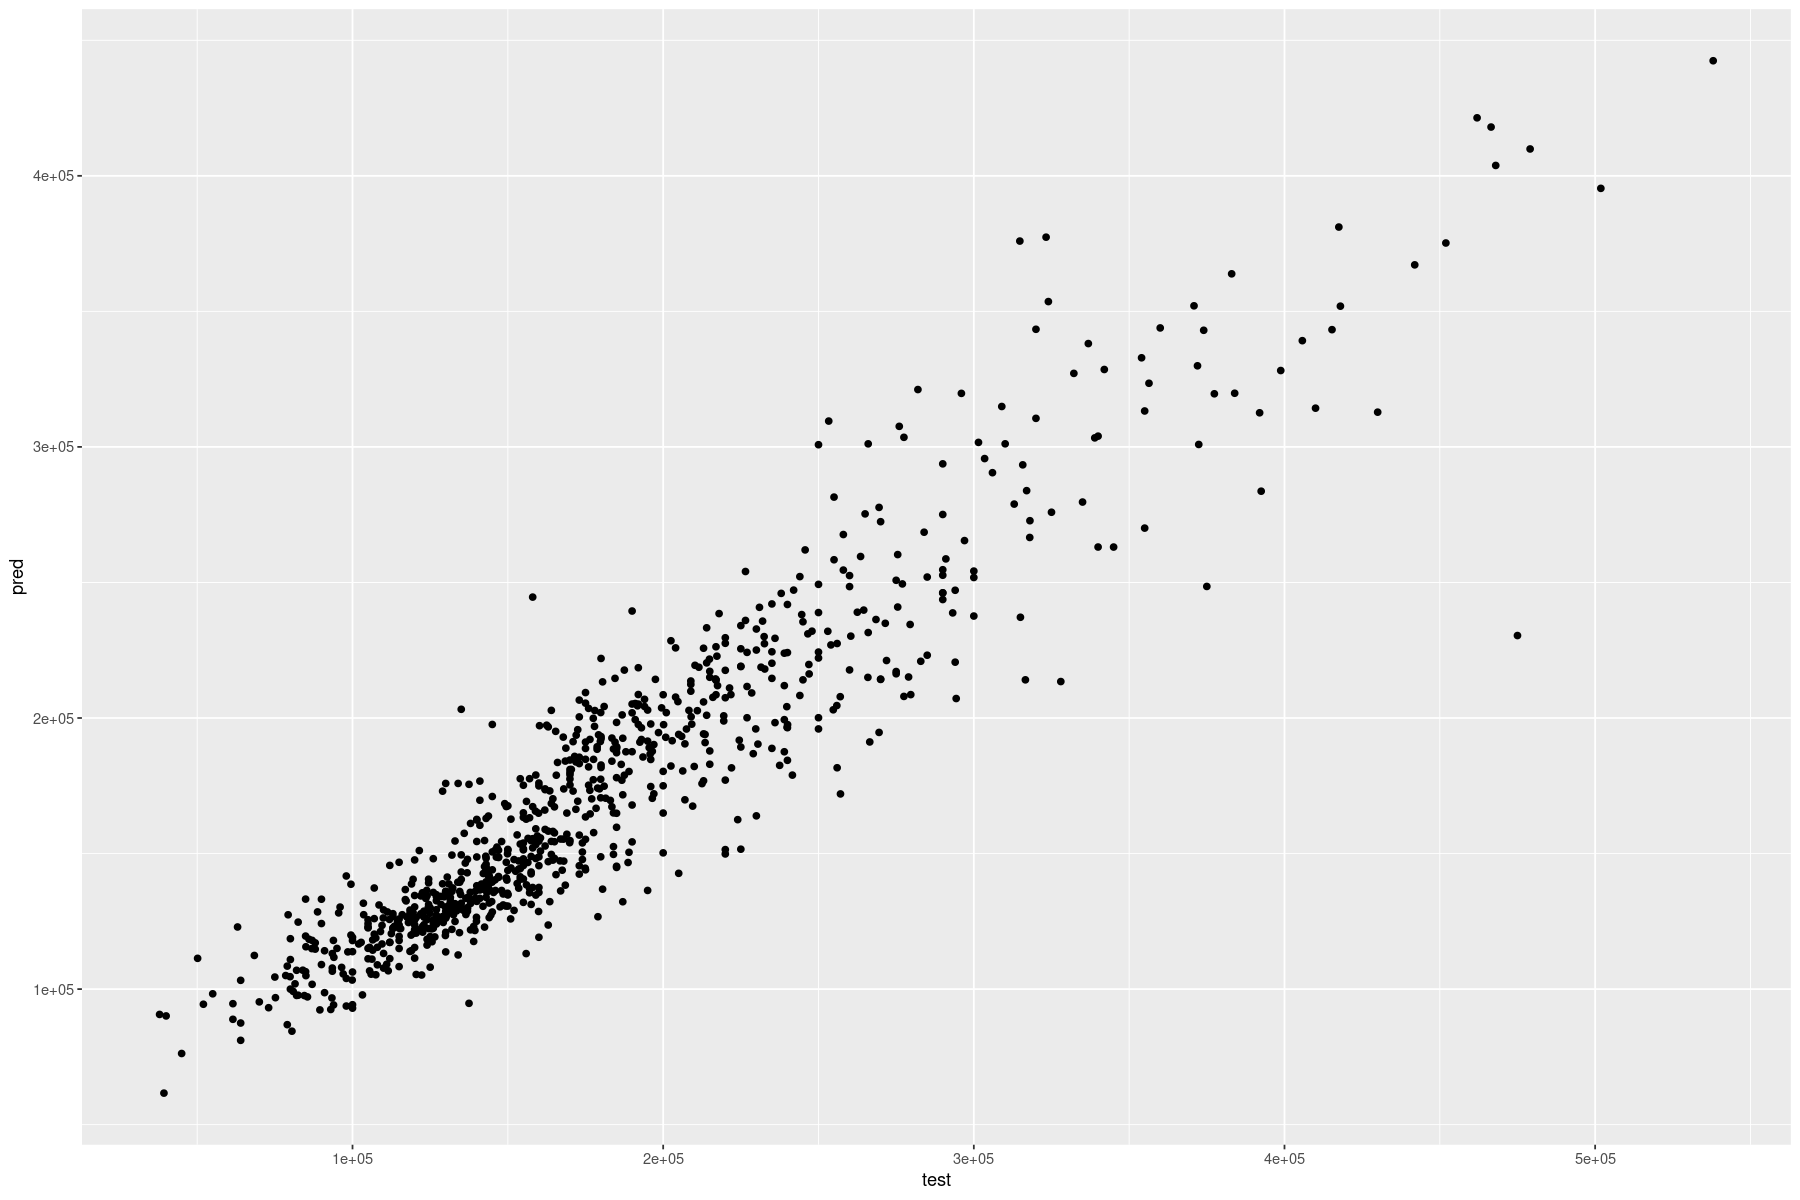

In [125]:
data.frame(pred = predict(knn_fit, test_caret), test = test_caret$Sale_Price ) %>% 
    ggplot(aes(x=test, y=pred)) + geom_point()

## all together

In [41]:
# Specify resampling strategy
cv <- trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5                
)

# Create grid of hyperparameter values
hyper_grid <- expand.grid(k = seq(2, 25, by = 4))

# Tune a knn model using grid search
knn_fit <- train(
  Sale_Price ~ ., 
  data = train_2, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  metric = "RMSE"
)
knn_fit

Warning message in train.default(x, y, weights = w, ...):
“The metric "RMSLE" was not in the result set. RMSE will be used instead.”


k-Nearest Neighbors 

2053 samples
  80 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1848, 1847, 1848, 1847, 1848, 1847, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   2  45485.76  0.6630989  30411.20
   6  42471.53  0.7044068  28458.65
  10  43250.59  0.6985047  28882.04
  14  43439.70  0.7038529  28979.50
  18  44060.25  0.7027594  29311.53
  22  44841.12  0.6976862  29782.69

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 6.

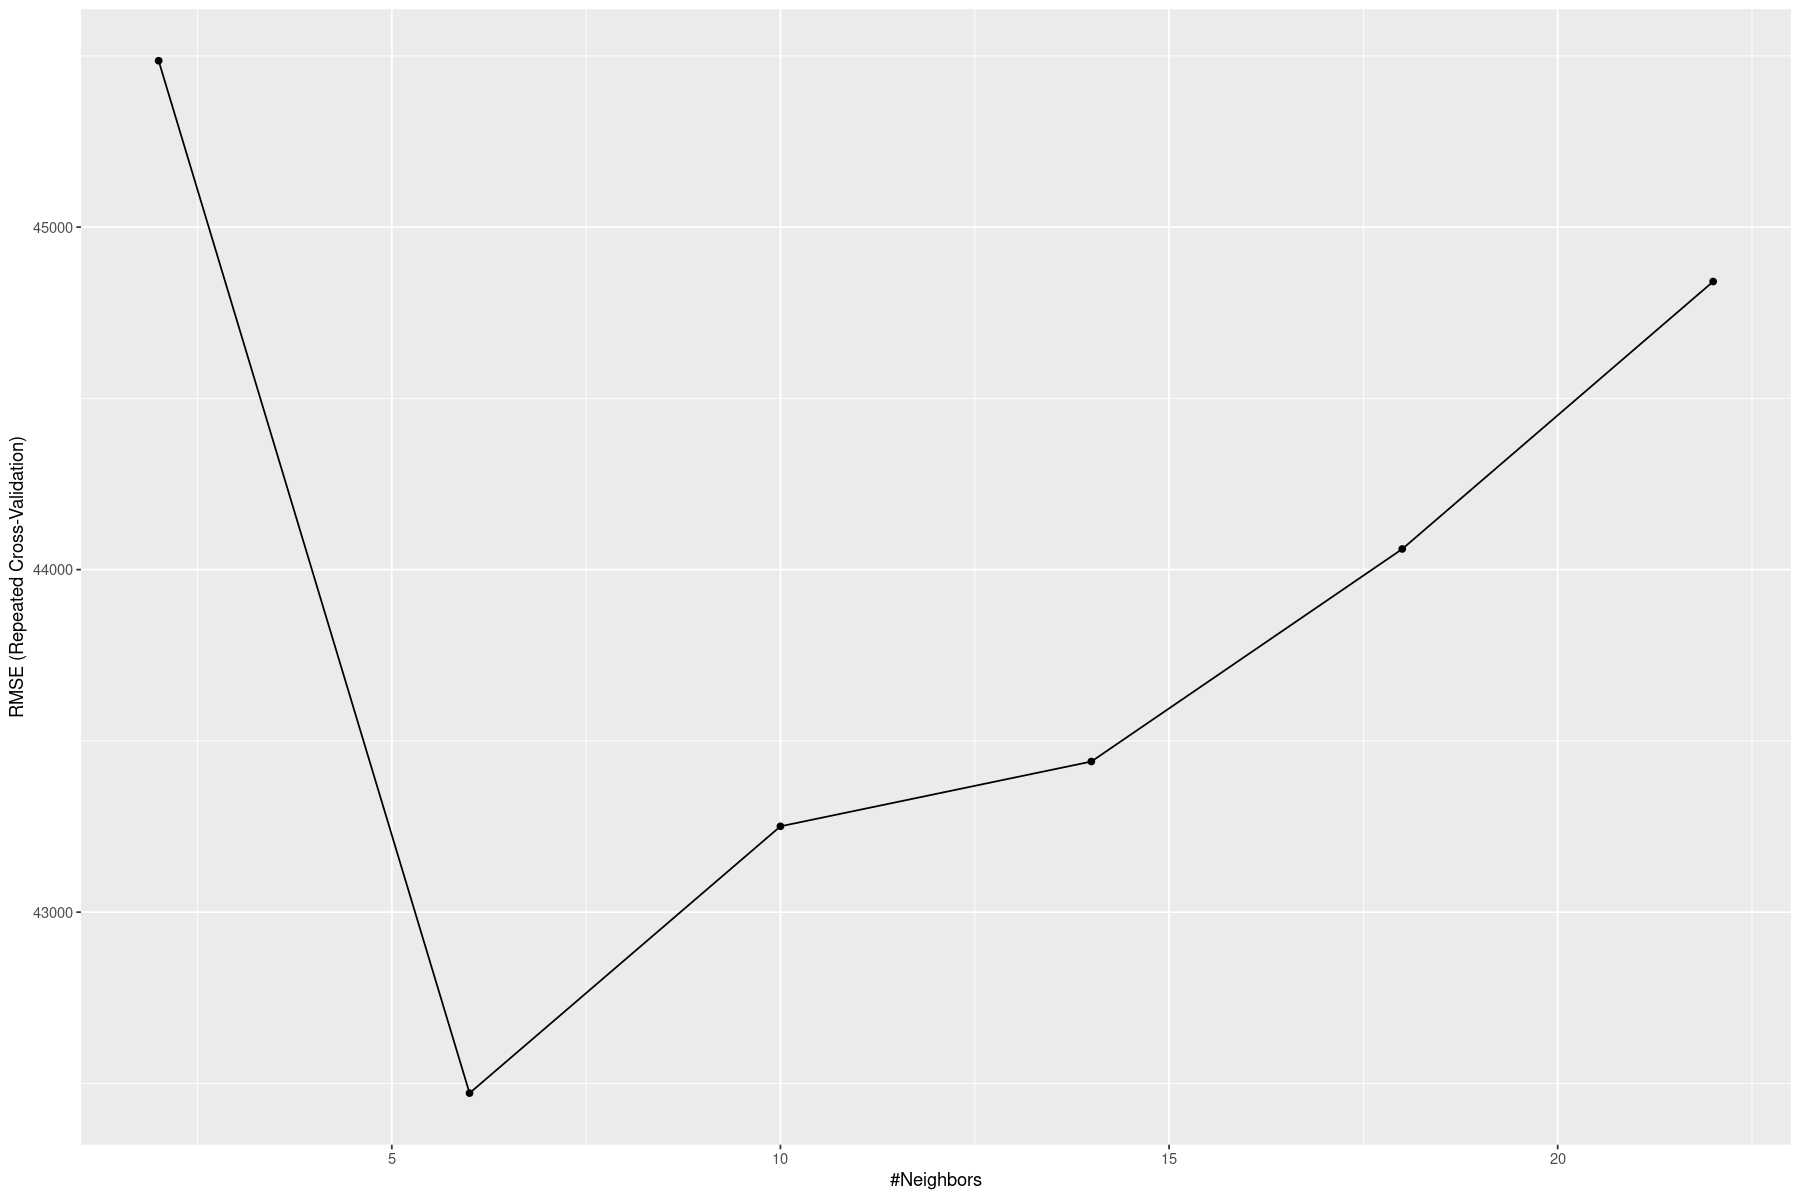

In [44]:
ggplot(knn_fit)


## Feature engineering
Hay una libreria que permite crear un pipeline con todas las transformaciones que queremos hacer a la data para que entre a nuestro modelo y que nos facilita el proceso para evaluar luego en la fase de testing donde simplemente pasamos la data son tener que procesarlar porque ya esta todo en el pipeline

In [107]:
# log transformation
blueprint <- recipe(Sale_Price ~ ., data = train_caret) %>%
  step_nzv(all_nominal()) %>%
  step_integer(matches("Qual|Cond|QC|Qu")) %>%
  step_center(all_numeric(), -all_outcomes()) %>%
  step_scale(all_numeric(), -all_outcomes()) %>%
  step_dummy(all_nominal(), -all_outcomes(), one_hot = TRUE)

In [108]:
blueprint

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         80

Operations:

Sparse, unbalanced variable filter on all_nominal()
Integer encoding for matches("Qual|Cond|QC|Qu")
Centering for all_numeric(), -all_outcomes()
Scaling for all_numeric(), -all_outcomes()
Dummy variables from all_nominal(), -all_outcomes()

In [112]:
prepare <- prep(blueprint, training = train_caret)
prepare

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         80

Training data contained 2053 data points and no missing data.

Operations:

Sparse, unbalanced variable filter removed Street, Alley, Land_Contour, ... [trained]
Integer encoding for Condition_1, Overall_Qual, Overall_Cond, ... [trained]
Centering for Lot_Frontage, Lot_Area, ... [trained]
Scaling for Lot_Frontage, Lot_Area, ... [trained]
Dummy variables from MS_SubClass, MS_Zoning, Lot_Shape, ... [trained]

In [114]:
baked_train <- bake(prepare, new_data = train_caret)
baked_test <- bake(prepare, new_data = test_caret)
baked_train

Lot_Frontage,Lot_Area,Condition_1,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,Exter_Qual,Exter_Cond,⋯,Sale_Type_COD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_CWD,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.4381283,2.648618556,-0.04154588,-0.07528616,-0.4933497,-0.354077344,-1.16812937,0.04327865,0.6737380,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
0.6386898,0.178080734,-1.16383116,-0.77466394,0.3912328,-0.321576191,-1.12017748,-0.55692162,0.6737380,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
0.6681888,0.502409329,-0.04154588,-0.07528616,0.3912328,-0.419079650,-1.26403313,0.02184293,0.6737380,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
1.0221767,0.121430522,-0.04154588,0.62409162,-0.4933497,-0.094068120,-0.78451430,-0.55692162,-0.7347997,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
0.4616959,0.448824605,-0.04154588,-0.77466394,-0.4933497,0.848465315,0.65404220,-0.55692162,0.6737380,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
0.5796918,-0.023505735,-0.04154588,-0.07528616,0.3912328,0.880966468,0.65404220,-0.44974300,0.6737380,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
-0.5117709,-0.643715201,-0.04154588,1.32346939,-0.4933497,0.978469927,0.79789785,-0.55692162,-0.7347997,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
-0.4527729,-0.633292542,-0.04154588,1.32346939,-0.4933497,0.685959551,0.36633090,-0.55692162,-0.7347997,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1
-0.5707689,-0.586206652,-0.04154588,1.32346939,-0.4933497,0.783463009,0.55813843,-0.55692162,-0.7347997,0.3726696,⋯,0,0,0,0,0,0,0,0,0,1


In [109]:
# Specify resampling strategy
cv <- trainControl(
  method = "cv", 
  number = 10, 
  #repeats = 5                
)

# Create grid of hyperparameter values
hyper_grid <- expand.grid(k = seq(10, 50, by = 10))

# Tune a knn model using grid search
knn_fit <- train(
  blueprint, 
  data = train_caret, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  metric = "RMSE"
)
knn_fit

k-Nearest Neighbors 

2053 samples
  80 predictor

Recipe steps: nzv, integer, center, scale, dummy 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1849, 1847, 1849, 1848, 1847, 1847, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
  10  35384.76  0.8333514  21221.92
  20  35272.88  0.8405605  21482.66
  30  35777.69  0.8412784  22018.49
  40  36430.97  0.8393994  22465.10
  50  36846.98  0.8393981  22842.12

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 20.

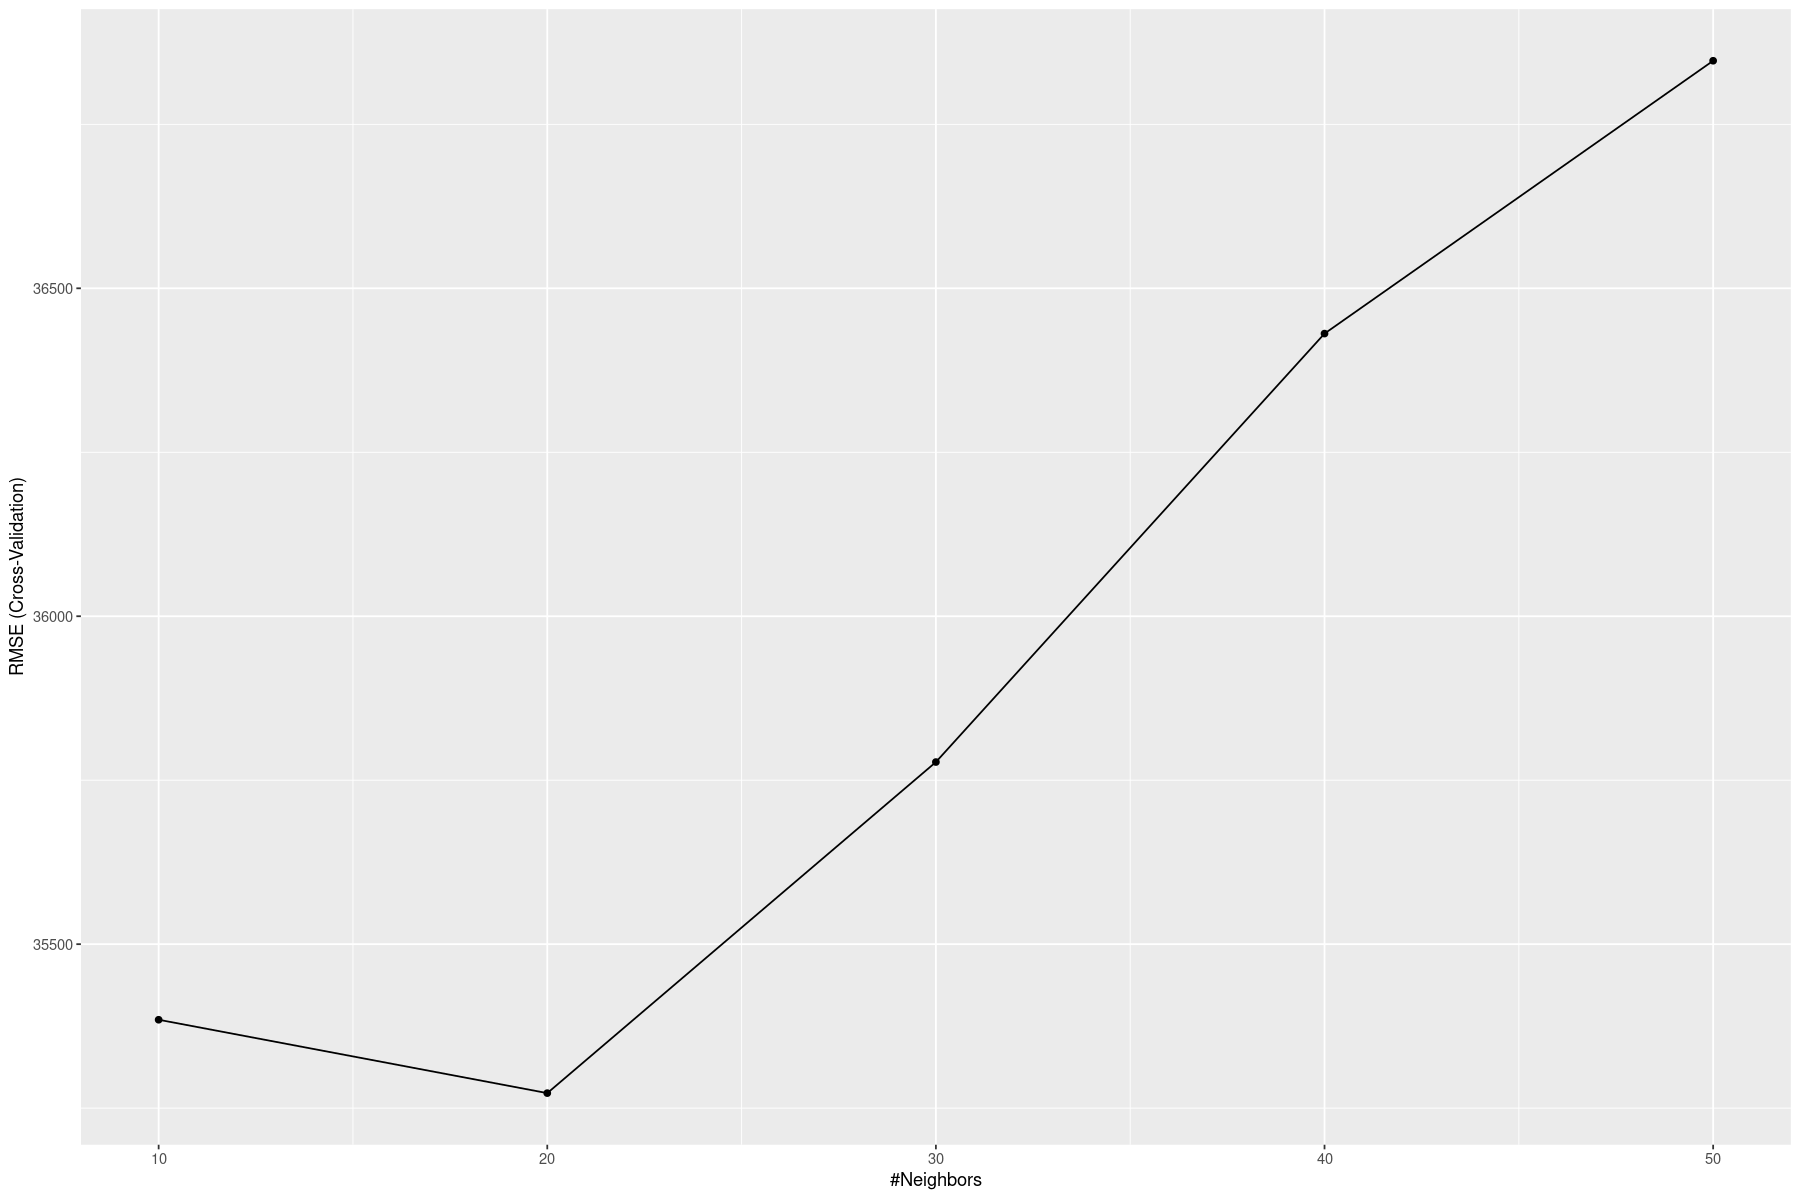

In [110]:
ggplot(knn_fit)


# References
* https://bradleyboehmke.github.io/HOML/engineering.html#ref-zheng2018feature
